In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [4]:
def resumetable(df):
    print(f'Dataset shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Missing Values Count'] = df.isnull().sum().values
    summary['Missing Values Percentage'] = df.isnull().sum().values / len(df) * 100
    summary['Unique Values Count'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    summary['Second to Last Value'] = df.iloc[-2].values
    summary['Last Value'] = df.iloc[-1].values
    return summary

def seed_everything(seed = 9234):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    # torch.manual_seed(seed)
    # torch.cuda.manual_seed(seed)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = True

seed_everything()

In [2]:
data = pd.read_csv("../Data/Soo_T_PATIENTS_DAILY_WHOLE_0812.csv")

In [6]:
data = data.drop(columns=["updtDate", "instDate", "sat_x", "sat_y", "sido", "create_date"])

In [7]:
resumetable(data)

Dataset shape: (26010, 53)


,Feature,Data Type,Missing Values Count,Missing Values Percentage,Unique Values Count,First Value,Second Value,Third Value,Second to Last Value,Last Value
0,sido_cd,int64,0,0.0,17,31.00,33.00,22.00,38.00,23.00
1,weekend_yn,int64,0,0.0,2,0.00,0.00,0.00,1.00,1.00
2,grid_x,int64,0,0.0,15,60.00,69.00,89.00,91.00,55.00
3,grid_y,int64,0,0.0,16,120.00,107.00,90.00,77.00,124.00
4,min_ta,float64,0,0.0,253,9.60,10.50,13.50,18.30,18.90
5,max_ta,float64,0,0.0,259,24.20,23.70,25.30,25.50,23.30
6,mean_ta,float64,0,0.0,231,16.60,17.10,19.00,21.50,21.50
7,gap_ta,float64,0,0.0,194,14.60,13.20,11.80,7.20,4.40
8,min_tafeel,float64,0,0.0,2144,12.35,12.78,16.29,20.86,20.11
9,max_tafeel,float64,0,0.0,1943,22.04,22.16,23.66,25.05,25.09


<Axes: xlabel='mean_ws', ylabel='jenks_cluster'>

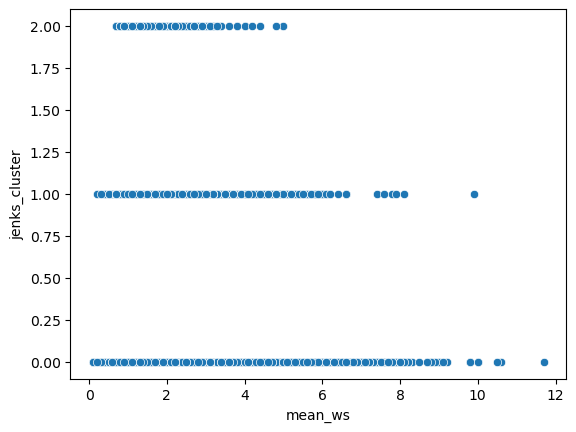

In [8]:
sns.scatterplot(data=data, x="mean_ws", y="jenks_cluster")

In [ ]:
# !pip install optuna

In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score

In [12]:
X = data.drop(columns=["jenks_cluster", "patientsCnt"])
y = data.jenks_cluster

seed_num = 43

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_num)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=seed_num)

In [13]:
X_train.shape, X_valid.shape, X_test.shape

((18207, 51), (2601, 51), (5202, 51))

In [15]:
y_train.shape, y_valid.shape, y_test.shape

((18207,), (2601,), (5202,))

In [16]:
params = {
    "n_estimators": 200,
    "max_depth": 8,
    "learning_rate": 0.01,
    "subsample": 0.8,
    "random_state": 42,
}

model = XGBClassifier(**params)
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
)

[0]	validation_0-mlogloss:1.08837
[1]	validation_0-mlogloss:1.07835
[2]	validation_0-mlogloss:1.06856
[3]	validation_0-mlogloss:1.05897
[4]	validation_0-mlogloss:1.04955
[5]	validation_0-mlogloss:1.04023
[6]	validation_0-mlogloss:1.03105
[7]	validation_0-mlogloss:1.02205
[8]	validation_0-mlogloss:1.01322
[9]	validation_0-mlogloss:1.00454
[10]	validation_0-mlogloss:0.99595
[11]	validation_0-mlogloss:0.98753
[12]	validation_0-mlogloss:0.97929
[13]	validation_0-mlogloss:0.97114
[14]	validation_0-mlogloss:0.96318
[15]	validation_0-mlogloss:0.95520
[16]	validation_0-mlogloss:0.94744
[17]	validation_0-mlogloss:0.93980
[18]	validation_0-mlogloss:0.93226
[19]	validation_0-mlogloss:0.92487
[20]	validation_0-mlogloss:0.91760
[21]	validation_0-mlogloss:0.91042
[22]	validation_0-mlogloss:0.90330
[23]	validation_0-mlogloss:0.89632
[24]	validation_0-mlogloss:0.88943
[25]	validation_0-mlogloss:0.88269
[26]	validation_0-mlogloss:0.87607
[27]	validation_0-mlogloss:0.86946
[28]	validation_0-mlogloss:0.8

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

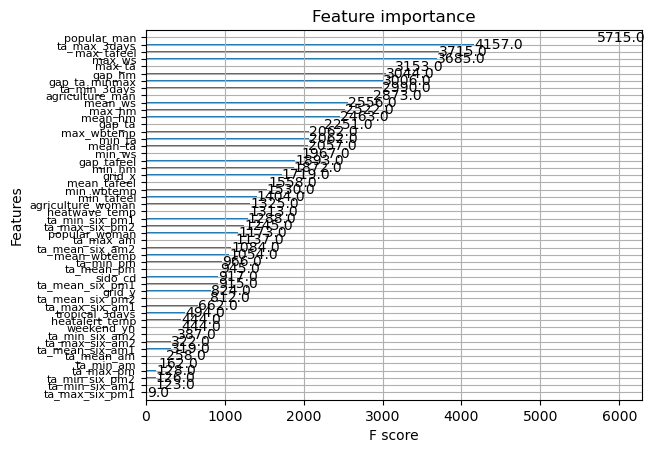

In [17]:
from xgboost import plot_importance
plot_importance(model)
# plt.figure(figsize=(24,12))
plt.yticks(fontsize=8)
plt.show()

In [18]:
model.feature_importances_

array([0.0093014 , 0.00549552, 0.01005876, 0.00865257, 0.00556027,
       0.01164459, 0.00862045, 0.00602034, 0.00659764, 0.08715136,
       0.00845882, 0.00654198, 0.00605689, 0.00562892, 0.00676617,
       0.00553598, 0.0070035 , 0.00624937, 0.0073887 , 0.        ,
       0.0055974 , 0.00567272, 0.00661288, 0.00733814, 0.00698643,
       0.00654291, 0.0064389 , 0.00688984, 0.00598745, 0.01710559,
       0.02654921, 0.00990083, 0.01403508, 0.00622557, 0.0268091 ,
       0.00664499, 0.00510012, 0.02135264, 0.32778457, 0.00752421,
       0.00575916, 0.0060177 , 0.00549993, 0.02278937, 0.01049219,
       0.01451571, 0.00148337, 0.16394517, 0.00696943, 0.01043921,
       0.00625693], dtype=float32)

In [19]:
preds = model.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # f1 스코어

In [21]:
def cal_class_score(y_test, preds, type_average="macro"):
    mask_class_0 = y_test == 0
    mask_class_1 = y_test == 1
    mask_class_2 = y_test == 2
    
    results = pd.DataFrame(
        {
            "class0": cal_matrix(y_test[mask_class_0], preds[mask_class_0], type_average),
            "class1": cal_matrix(y_test[mask_class_1], preds[mask_class_1], type_average),
            "class2": cal_matrix(y_test[mask_class_2], preds[mask_class_2], type_average),
        }
    )
    results = results.T
    results.columns = ["accuracy", "precision", "recall", "F1"]
    return results

def cal_matrix(y_test, preds, type_average):
    result_class = []
    result_class.append(accuracy_score(y_test, preds))
    result_class.append(precision_score(y_test, preds, average=type_average).tolist())
    result_class.append(recall_score(y_test, preds, average=type_average).tolist())
    result_class.append(f1_score(y_test, preds, average=type_average).tolist())
    return result_class

In [22]:
test = cal_class_score(y_test, preds, type_average="macro")

c:\Users\ecobrain\miniconda3\envs\khs\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ecobrain\miniconda3\envs\khs\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ecobrain\miniconda3\envs\khs\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
test

,accuracy,precision,recall,F1
class0,0.945682,0.500000,0.472841,0.486041
class1,0.614621,0.333333,0.204874,0.253773
class2,0.434343,0.333333,0.144781,0.201878


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, digits=3))

              precision    recall  f1-score   support

           0      0.901     0.946     0.923      3995
           1      0.716     0.615     0.661      1108
           2      0.741     0.434     0.548        99

    accuracy                          0.865      5202
   macro avg      0.786     0.665     0.711      5202
weighted avg      0.859     0.865     0.860      5202

